In [1]:
import pandas as pd 
ratings_file ='../../data/processed/amazon_all_beauty/ratings.csv'
df = pd.read_csv(ratings_file)
df.head()



,userId,itemId,rating,timestamp
0,AGKHLEW2SOWHNMFQIJGBECAF7INQ,B00YQ6X8EO,5.0,1.588688e+09
1,AGKHLEW2SOWHNMFQIJGBECAF7INQ,B081TJ8YS3,4.0,1.588616e+09
2,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,B07PNNCSP9,5.0,1.589665e+09
3,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,B09JS339BZ,1.0,1.643394e+09
4,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,B08BZ63GMJ,5.0,1.609323e+09


In [6]:
df.isnull().sum()

userId       0
itemId       0
rating       0
timestamp    0
dtype: int64

In [2]:
df.describe()


,rating,timestamp
count,694252.000000,6.942520e+05
mean,3.960892,1.554762e+09
std,1.493950,8.004244e+07
min,1.000000,9.730527e+08
25%,3.000000,1.501612e+09
50%,5.000000,1.571538e+09
75%,5.000000,1.614636e+09
max,5.000000,1.694220e+09


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694252 entries, 0 to 694251
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     694252 non-null  object 
 1   itemId     694252 non-null  object 
 2   rating     694252 non-null  float64
 3   timestamp  694252 non-null  float64
dtypes: float64(2), object(2)
memory usage: 21.2+ MB


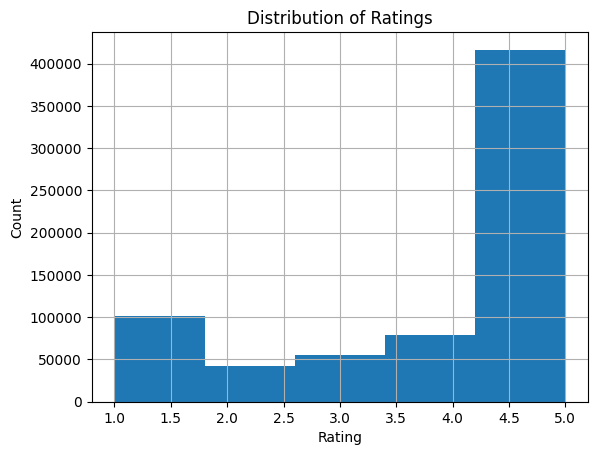

In [4]:
import matplotlib.pyplot as plt 
df['rating'].hist(bins=5)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [6]:
user_rating_counts = df['userId'].value_counts()
# Display the top 10 users by number of ratings
print("Top 10 users by number of ratings:")
print(user_rating_counts.head(10))
# Get a statistical summary of the user rating counts
print("\\nSummary of user rating counts:")
print(user_rating_counts.describe())


Top 10 users by number of ratings:
userId
AG73BVBKUOH22USSFJA5ZWL7AKXA      165
AEZP6Z2C5AVQDZAJECQYZWQRNG3Q      146
AEMP3A7IKW37CMWFXNKXWW6HGJHA_1    115
AGZUJTI7A3JFKB4FP5JOH6NVAJIQ_1     87
AFDYIK3FNPY2JFBQYUWC6GSBMIRQ_2     83
AFXF3EGQTQDXMRLDWFU7UBFQZB7Q       81
AEJU3Z6HDAERETMYI2CXBQVPPDFA       79
AHY2TURQPNIDXZGH2CMQLZ343YMQ       69
AEOK4TQIKGO23SJKZ6PW4FETNNDA_1     68
AEAXAJACFMXIAAH4WOHRMXPSZWFA       65
Name: count, dtype: int64
\nSummary of user rating counts:
count    631986.000000
mean          1.098524
std           0.728334
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         165.000000
Name: count, dtype: float64


In [12]:
item_rating_counts = df['itemId'].value_counts()
# Display the top 10 items by number of ratings
print("Top 10 items by number of ratings:")
print(item_rating_counts.head(10))
# Get a statistical summary of the item rating counts
print("\\nSummary of item rating counts:")
print(item_rating_counts.describe())


Top 10 items by number of ratings:
itemId
B007IAE5WY    34
B00EEN2HCS    25
B012Q9NGE4    20
B0092MCQZ4    20
B00R1TAN7I    18
B07TK2PSJF    18
B0107QYW14    18
B0171UQIUW    17
B07C533XCW    17
B01DUYNJL4    14
Name: count, dtype: int64
\nSummary of item rating counts:
count    7218.000000
mean        1.383624
std         1.202092
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        34.000000
Name: count, dtype: float64


In [10]:
user_rating_counts = df['userId'].value_counts()
print(user_rating_counts.describe())

count    631986.000000
mean          1.098524
std           0.728334
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         165.000000
Name: count, dtype: float64


In [11]:
item_rating_counts = df['itemId'].value_counts()
print(item_rating_counts.describe())



count    115709.000000
mean          5.999983
std          23.169142
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1952.000000
Name: count, dtype: float64


In [16]:
min_user_ratings=5
user_counts=df['userId'].value_counts()
active_users=user_counts[user_counts >= min_user_ratings].index
df_filtered_users=df[df['userId'].isin(active_users)]

min_item_ratings=5
item_counts=df_filtered_users['itemId'].value_counts()
popular_items=item_counts[item_counts >= min_item_ratings].index
df_final=df_filtered_users[df_filtered_users['itemId'].isin(popular_items)]
print("Original df shape:", df.shape)
print("shape after filtering users:", df_filtered_users.shape)
print("shape after filtereing items:", df_final.shape)

Original df shape: (694252, 4)
shape after filtering users: (14008, 4)
shape after filtereing items: (5345, 4)
